## The following effort is to find the data generating process. When a time series has periods of different volatility, or is drawn from non-normal distribution but processing of  the data is done ignoring these facts, then the analysis is biased towards the more volatile periods and less to the quiescent periods.
## This makes this analysis very important.

In [14]:
from yfinance import download
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.base.model import GenericLikelihoodModel
from datetime import datetime
from scipy.stats import norm

In [2]:
# get the daily returns of the S&P 500 
SPX=download('^GSPC','1957-03-01').dropna()
SPX

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1957-03-01,43.740002,43.740002,43.740002,43.740002,43.740002,1700000
1957-03-04,44.060001,44.060001,44.060001,44.060001,44.060001,1890000
1957-03-05,44.220001,44.220001,44.220001,44.220001,44.220001,1860000
1957-03-06,44.230000,44.230000,44.230000,44.230000,44.230000,1840000
1957-03-07,44.209999,44.209999,44.209999,44.209999,44.209999,1830000
...,...,...,...,...,...,...
2022-07-18,3883.790039,3902.439941,3818.629883,3830.850098,3830.850098,3414470000
2022-07-19,3860.729980,3939.810059,3860.729980,3936.689941,3936.689941,3160350000
2022-07-20,3935.320068,3974.129883,3922.030029,3959.899902,3959.899902,3452150000


### Find the daily return value from Adjusted Closing Price

In [3]:
SPX['Return'] = SPX['Adj Close'].pct_change()*100

### Change the datetime index to period format

In [4]:
SPX.index = pd.DatetimeIndex(SPX.index).to_period('D')

In [5]:
SPX.dropna(inplace=True)
SPX.loc[SPX['Volume']==0, 'Volume'] = np.nan

In [6]:
SPX

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
1957-03-04,44.060001,44.060001,44.060001,44.060001,44.060001,1.890000e+06,0.731595
1957-03-05,44.220001,44.220001,44.220001,44.220001,44.220001,1.860000e+06,0.363141
1957-03-06,44.230000,44.230000,44.230000,44.230000,44.230000,1.840000e+06,0.022610
1957-03-07,44.209999,44.209999,44.209999,44.209999,44.209999,1.830000e+06,-0.045219
1957-03-08,44.070000,44.070000,44.070000,44.070000,44.070000,1.630000e+06,-0.316669
...,...,...,...,...,...,...,...
2022-07-18,3883.790039,3902.439941,3818.629883,3830.850098,3830.850098,3.414470e+09,-0.836357
2022-07-19,3860.729980,3939.810059,3860.729980,3936.689941,3936.689941,3.160350e+09,2.762829
2022-07-20,3935.320068,3974.129883,3922.030029,3959.899902,3959.899902,3.452150e+09,0.589581


## Daily closing values of S&P 500
### It shows growth which approximately matches exponential curve if volatility is neglected.

Text(0.5, 1.0, 'Daily Closes 1957-03-04 to 2022-07-22')

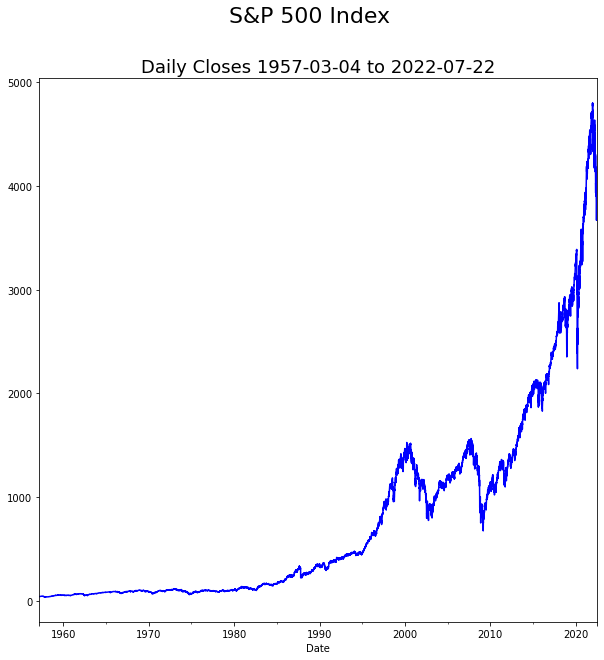

In [7]:
figure, plot = plt.subplots(figsize=(10,10))
SPX['Adj Close'].plot(ax = plot, color = 'blue')
figure.suptitle('S&P 500 Index', fontsize=22)
plot.set_title('Daily Closes %s to %s' % (SPX.index[0], SPX.index[-1]), fontsize=18)

## Plotting the values on a logarithmic scale
### It has approximately constant gradient confirming that models featuring exponential growth are reasonable.

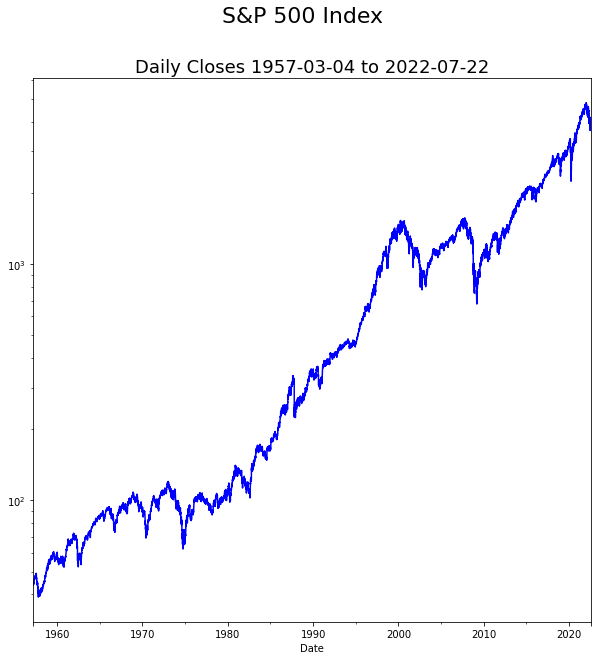

In [8]:
figure, plot = plt.subplots(figsize=(10,10))
SPX['Adj Close'].plot(ax=plot, color='blue')
figure.suptitle('S&P 500 Index', fontsize=22)
plot.set_title('Daily Closes %s to %s' % (SPX.index[0], SPX.index[-1]), fontsize=18)
plot.set_yscale('log')

## Histogram of daily returns with Normal distribution curve

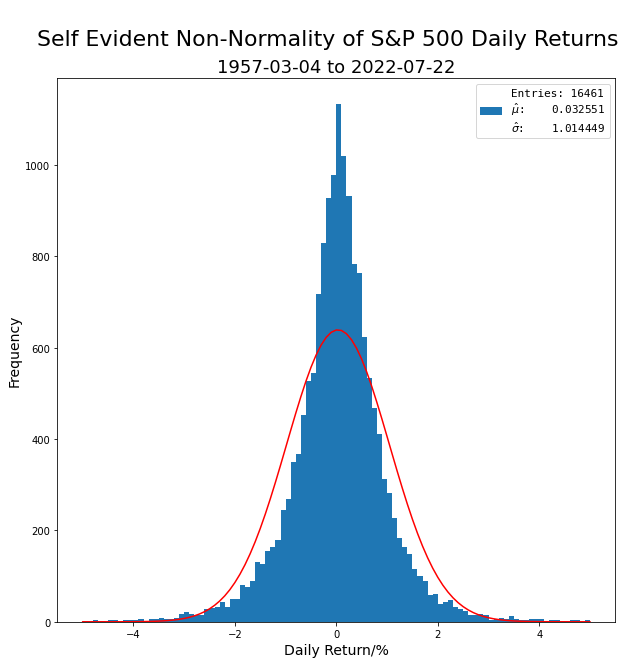

In [9]:
estimates=norm.fit(SPX['Return'])
model=norm(*estimates)
figure,plot=plt.subplots(figsize=(10,10))
samples,bins,patches=plot.hist(SPX['Return'],bins=np.linspace(-5,5,101),label="""Entries: %d
$\\hat{\\mu}$:%12.6f
$\\hat{\\sigma}$:%12.6f""" % (SPX["Return"].count(),estimates[-2],estimates[-1]))
plot.plot(bins,model.pdf(bins)*sum(samples)*(bins[-1]-bins[0])/len(bins),'-r')
plot.set_xlabel("Daily Return/%",fontsize=14)
plot.set_ylabel("Frequency",fontsize=14)
figure.suptitle("\nSelf Evident Non-Normality of S&P 500 Daily Returns",fontsize=22)
plot.set_title("%s to %s" % (SPX.index[0],SPX.index[-1]),fontsize=18)
plt.setp(plot.legend(loc='upper right',fontsize=11).texts,family='monospace');

## Histogram of daily returns with Generalized Error Distribution

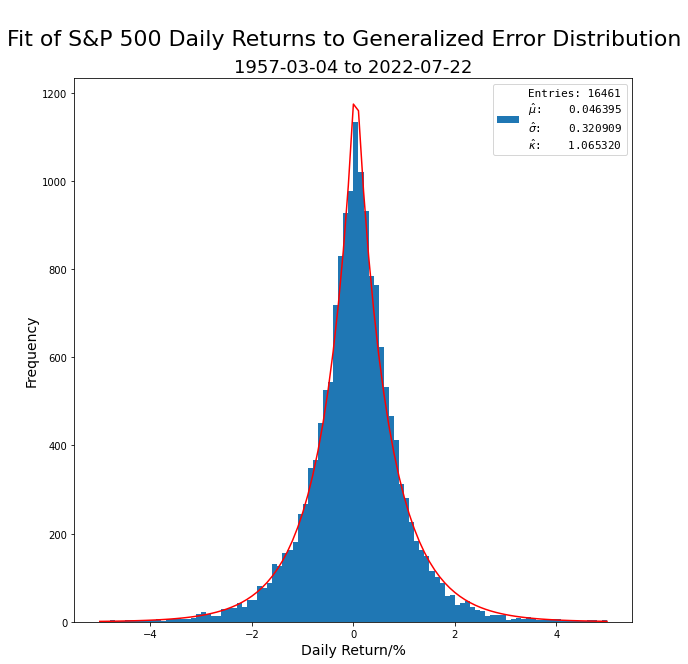

In [10]:
from scipy.stats import gennorm
estimates=gennorm.fit(SPX['Return'])
model=gennorm(*estimates)
figure,plot=plt.subplots(figsize=(10,10))
samples,bins,patches=plot.hist(SPX['Return'],bins=np.linspace(-5,5,101),label="""Entries: %d
$\\hat{\\mu}$:%12.6f
$\\hat{\\sigma}$:%12.6f
$\\hat{\\kappa}$:%12.6f""" % (SPX["Return"].count(),estimates[-2],estimates[-1]/np.power(2,estimates[0]),1/estimates[0]))
plot.plot(bins,model.pdf(bins)*sum(samples)*(bins[-1]-bins[0])/len(bins),'-r')
plot.set_xlabel("Daily Return/%",fontsize=14)
plot.set_ylabel("Frequency",fontsize=14)
figure.suptitle("\nFit of S&P 500 Daily Returns to Generalized Error Distribution",fontsize=22)
plot.set_title("%s to %s" % (SPX.index[0],SPX.index[-1]),fontsize=18)
plt.setp(plot.legend(loc='upper right',fontsize=11).texts,family='monospace');

### Here I am lumping together 60 years of data. It might be unresonable to expect the growth rate, mean, volatility, SD to remain same over the entire period.
### Perhaps the data is locally Normal, but not with globaly constant parameters. 
### If that were the case, we know that it is not the mean that is causing the 'kurtosis' we have observed above. If the mean were following some kind of stochastic processes, the effect would be to blur out the distribution creating platykurtosis.
### The mechanism has to be one in which the variance is responsible for creating the distributional shape we are observing

### F-test is useful in comparing the sample variance of two groups of data. But this test assumes that the data is normal. 
### This condition of normality might not make it the best test for constancy of variance(homoscedasticity) but we are trying to address the hypothesis here.

## F-test on every pair of sequential years from 1957 to 2022

,v1,n1,v2,n2,F,p
Date,,,,,,
1958,0.320143,252,0.707628,210.0,0.452418,1.000000e+00
1959,0.350320,253,0.320143,252.0,1.094259,2.373847e-01
1960,0.428305,252,0.350320,253.0,1.222611,5.545160e-02
1961,0.406079,250,0.428305,252.0,0.948107,6.633016e-01
1962,1.085471,252,0.406079,250.0,2.673056,1.199041e-14
...,...,...,...,...,...,...
2018,1.153792,251,0.177373,251.0,6.504876,1.110223e-16
2019,0.617271,252,1.153792,251.0,0.534993,9.999996e-01
2020,4.704339,253,0.617271,252.0,7.621188,1.110223e-16


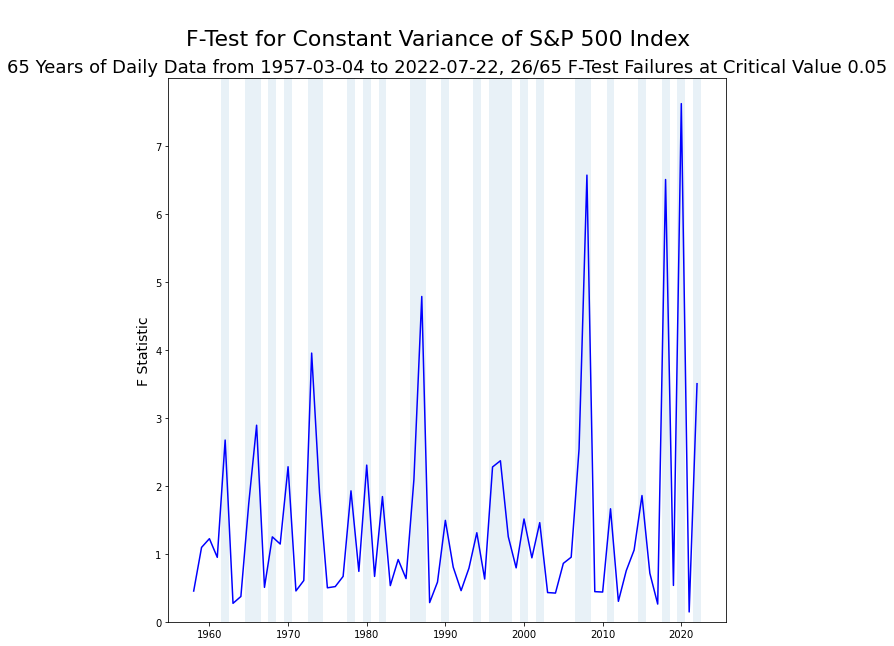

In [11]:
from scipy.stats import f
variance=pd.DataFrame({"v1":SPX["Return"].groupby(SPX.index.year).var(),"n1":SPX["Return"].groupby(SPX.index.year).count()})
variance["v2"]=variance["v1"].shift()
variance["n2"]=variance["n1"].shift()
variance["F"]=variance["v1"]/variance["v2"]
variance["p"]=list(map(lambda i:1-f.cdf(variance.loc[i,"F"],variance.loc[i,"n1"],variance.loc[i,"n2"]),variance.index))
variance.dropna(inplace=True)
nt,alpha=variance.shape[0],0.05
nf=variance[variance["p"]<=alpha].shape[0]
display(variance)

# Figure 2.5
figure,plot=plt.subplots(figsize=(10,10))
variance['F'].plot(ax=plot,color='blue')
figure.suptitle('\nF-Test for Constant Variance of S&P 500 Index',fontsize=22)
plot.set_title('%d Years of Daily Data from %s to %s, %d/%d F-Test Failures at Critical Value %.2f' % (variance.shape[0],SPX.index[0],SPX.index[-1],nf,nt,alpha),fontsize=18)
plot.set_ylabel("F Statistic",fontsize=14)

for year in variance.index[variance["p"]<=alpha]:
    plot.axvspan(year-0.5,year+0.5,alpha=0.1)

plot.set_xlabel(None)
plot.set_ylim(0,None);

### In 25 of the 63 years, the test is a failure with critical value 0.05. Thus rejecting the null hypothesis that the variances in two years are equal and normally distributed with 95% confidence.
### Thus either data is not normal or they are not hemoscedastic or both.

### Heteroscedasticity

### In the following plot, S&P 500 Index, is represented as a series of spikes. This suggests that there are episodes of higher and lower varience and also quiescent periods.
### This suggests that it is autoregressive, ie we should consider a hidden/latent variance time series, where today's variance is directly proportional to yesterday's variance.

## Daily Returns of S&P 500 Index as a series of spikes

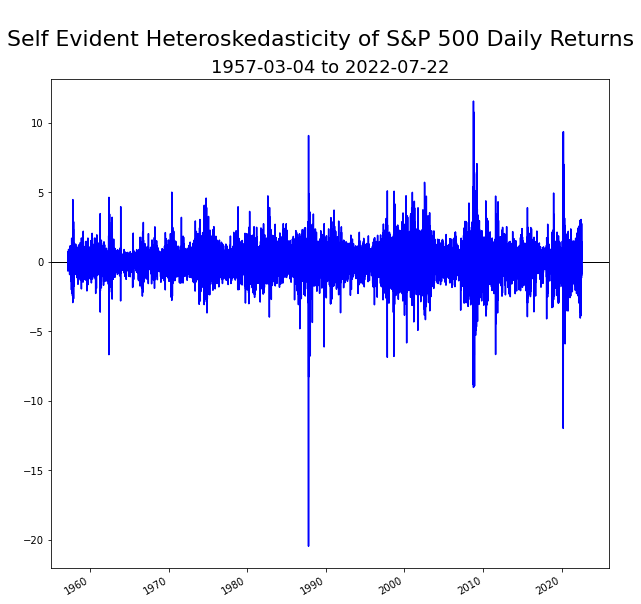

In [12]:
figure,plot=plt.subplots(figsize=(10,10))
plot.axhline(color='black',lw=1)
SPX['Return'].plot(ax=plot,color='blue')
figure.suptitle('\nSelf Evident Heteroskedasticity of S&P 500 Daily Returns',fontsize=22)
plot.set_title('%s to %s' % (SPX.index[0],SPX.index[-1]),fontsize=18)
plot.set_xlim(datetime(int(np.floor(SPX.index[0].year/5))*5,1,1),datetime(int(np.ceil(SPX.index[-1].year/5)*5),12,31))
plot.set_xlabel(None);

## Scatter plot of tomorrow's daily return squarred versus today's daily return squarred for every pair of days in dataset. 
### This is plotted with logarithmic scales. There are lots of dots but there doesn't seem to be any direct evidence for regions of the plot that are dramatically different in their nature.
### This supports Engle's hypothesis of a linear autoregressive releationship.

In [17]:
# Linear Regression of r^2(t+1) onto r^2(t)
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
df=pd.DataFrame({"y":np.power(SPX["Return"],2),"x":np.power(SPX["Return"].shift(),2)}).dropna()
alpha=0.05 # set alpha_critical to 5%
fit=ols("y ~ x",df).fit() # do OLS regression
df["yhat"]=fit.fittedvalues # get the fitted values
df["sig"],df["crl"],df["cru"]=wls_prediction_std(fit,alpha=alpha) # get the confidence region
df.sort_values(by="x",inplace=True)
print(fit.summary()) # print the regression summary

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     893.7
Date:                Sat, 23 Jul 2022   Prob (F-statistic):          2.85e-191
Time:                        08:50:20   Log-Likelihood:                -49001.
No. Observations:               16460   AIC:                         9.801e+04
Df Residuals:                   16458   BIC:                         9.802e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7964      0.038     21.047      0.0

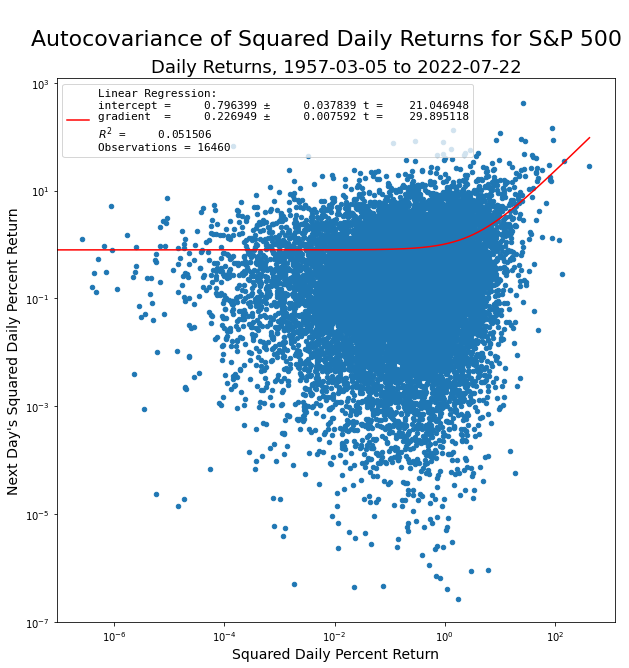

In [18]:
figure,plot=plt.subplots(figsize=(10,10))
df.plot.scatter("x","y",ax=plot)
df.plot.line("x","yhat",ax=plot,label="""Linear Regression:
intercept = %12.6f ± %12.6f t = %12.6f
gradient  = %12.6f ± %12.6f t = %12.6f
$R^2$ = %12.6f
Observations = %d""" % (
    fit.params[0],fit.bse[0],fit.tvalues[0],
    fit.params[1],fit.bse[1],fit.tvalues[1],
    fit.rsquared,
    df.shape[0]),color="red")
plot.set_xscale('log')
plot.set_yscale('log')
plot.set_ylim(1e-7,None)
figure.suptitle("\nAutocovariance of Squared Daily Returns for S&P 500",fontsize=22)
plot.set_title('Daily Returns, %s to %s' % (min(df.index),max(df.index)),fontsize=18)
plot.set_xlabel("Squared Daily Percent Return",fontsize=14)
plot.set_ylabel("Next Day's Squared Daily Percent Return",fontsize=14)
plt.setp(plot.legend(loc='best',fontsize=11).texts,family='monospace');

### With Engle's result, for the data to be of Normal Distribution, the intercept / alpha should be 0 or close to it. Due to large and significant value of inercept / alpha, the Normal distribution is ruled out.

## GARCH With Generalised Error Distribution

In [16]:
!pip3 install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 4.9 MB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


Installing ARCH and fitting model with GED innovations.
Optimization terminated successfully    (Exit mode 0)
            Current function value: 19723.72879576839
            Iterations: 14
            Function evaluations: 102
            Gradient evaluations: 14
                           Constant Mean - GARCH Model Results                            
Dep. Variable:                             Return   R-squared:                       0.000
Mean Model:                         Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                  GARCH   Log-Likelihood:               -19723.7
Distribution:      Generalized Error Distribution   AIC:                           39457.5
Method:                        Maximum Likelihood   BIC:                           39496.0
                                                    No. Observations:                16461
Date:                            Sat, Jul 23 2022   Df Residuals:                    16460
Time: 

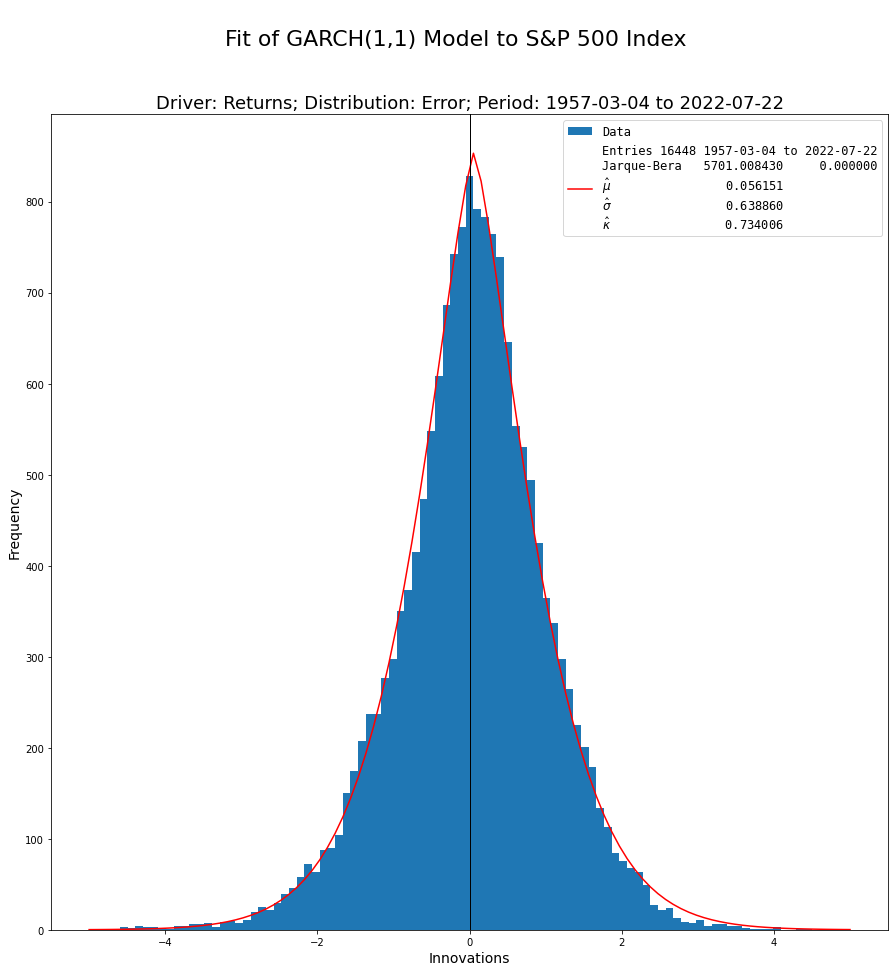

In [17]:
# fit a GARCH model using arch package
print("Installing ARCH and fitting model with GED innovations.")
from arch.univariate import ConstantMean, GARCH, GeneralizedError

model = ConstantMean(SPX["Return"])
model.volatility = GARCH(1, 0, 1)
model.distribution = GeneralizedError()
fit=model.fit(update_freq=0)
print(fit.summary())
SPX["Volatility"]=fit.conditional_volatility
SPX["Innovations"]=SPX["Return"]/SPX["Volatility"]

# fit normal pdf to plot
from scipy.stats import gennorm as density,jarque_bera
params=density.fit(SPX["Innovations"])
fitted=density(*params)
print("Fitted GED distribution to residuals: %g,%g,%g" % (params[1],params[2]/np.power(2,1/params[0]),1/params[0]))
test=jarque_bera(SPX["Innovations"])
print("Jarque-Bera Test results: %g,%g" % test)

# Figure 2.9
figure,plot=plt.subplots(figsize=(15,15))
counts,bins,patches=plot.hist(SPX["Innovations"],bins=np.linspace(-5,5,100),label='Data')
plot.plot(bins,fitted.pdf(bins)*(max(bins)-min(bins))/(len(bins)-1)*sum(counts),'-r',label="""Entries %d %s to %s
Jarque-Bera  %12.6f %12.6f
$\\hat\\mu$            %12.6f
$\\hat\\sigma$            %12.6f 
$\\hat\\kappa$            %12.6f""" % (
    sum(counts),min(SPX.index),max(SPX.index),
    test[0],test[1],
    params[1],
    params[2]/np.power(2,1/params[0]),
    1/params[0]
))
plot.axvline(color='black',lw=1)
plot.set_xlabel("Innovations",fontsize=14)
plot.set_ylabel("Frequency",fontsize=14)
figure.suptitle("\nFit of GARCH(1,1) Model to S&P 500 Index",fontsize=22)
plot.set_title("Driver: Returns; Distribution: Error; Period: %s to %s" % (min(SPX.index),max(SPX.index)),fontsize=18)
plt.setp(plot.legend(loc='best',fontsize=12).texts,family='monospace');

### The test here is to examine the shape coefficient 'k', which from the output is 0.734. This is inconsistent with 0.5, which is the required value for a Normal distribution. With this we can reject the hypothesis that the data is normally distributed.

### The coefficients are A, B, C which we get from GARCH model. The Null Hypothesis of homoskedasticity corresponds to A=B=0. The data thus rejects this.